In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory 
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


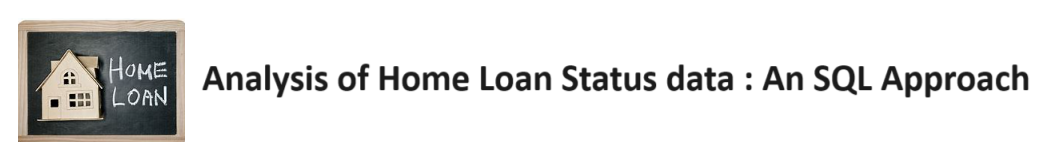

<div style="background-color:#A23BEC; color: black; padding: 10px; border: 2px solid black;">
    <h1 style="text-align: center;"> Load, Understand and Clean the data </h1>
</div>

##  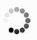 Load data 

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

In [3]:
#!pip install ipython-sql

In [4]:
data = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##  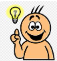 Understand the data

In [5]:
# Data dimensions
data.shape

(614, 13)

In [6]:
# Data point attributes
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# Print summary of the dataframe object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 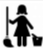 Data Cleaning 

In [8]:
data_cleaning = data.copy()

In [9]:
# Remove first column
data_cleaning = data_cleaning.iloc[: , 1:]
#data_cleaning.head(1)

In [10]:
# Check for duplicates
data_cleaning.duplicated().any()

False

In [11]:
# Check percentage of missing values
perc_missing_vals = round((data_cleaning.isnull().sum() * 100) / data_cleaning.shape[0], 2)
perc_missing_vals = perc_missing_vals[perc_missing_vals > 0].sort_values(ascending=False)

# Impute missing values
for col in perc_missing_vals.index:
    ## Categorical variables imputed with mode
    if data_cleaning[col].dtype == 'object':
        data_cleaning[col] = data_cleaning[col].fillna(data_cleaning[col].mode()[0])
    ## Numerical variables imputed with median
    else:
        data_cleaning[col] = data_cleaning[col].fillna(data_cleaning[col].median())
        
# Check if there are still missing values
data_cleaning.isnull().any().any()

False

In [12]:
df = data_cleaning.copy()

<div style="background-color:#A23BEC; color: black; padding: 10px; border: 2px solid black;">
    <h1 style="text-align: center;">SQL Queries </h1>
</div>

## 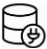 Load data to SQLite database and establish connection

In [13]:
# Initialize new engine as interface to database
engine = create_engine('sqlite:///loan_data.db')

# Connect to database
conn = engine.connect()

# Write pandas dataframe to SQL database
df.to_sql('loan_status_data', engine , if_exists='replace', index=False)

614

In [14]:
# Load SQL extension in Ipython environment
%load_ext sql

# Connect to SQLite database: loan_data.db
%sql sqlite:///loan_data.db


In [15]:
%%sql
-- List all the tables in the database
SELECT
    name
FROM sqlite_master
WHERE type = 'table';

 * sqlite:///loan_data.db
Done.


name
loan_status_data


In [16]:
%%sql
-- Retrieve first 5 records from the 'loan_status_data' table
SELECT *
FROM loan_status_data
LIMIT 5;

 * sqlite:///loan_data.db
Done.


Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 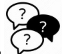 Queries

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">1. How many loans are in the dataset.</h2>
</div>


In [17]:
%%sql
-- Count the number of loans submitted for approval
SELECT 
    COUNT(*) AS total_loan_applications
FROM loan_status_data;

 * sqlite:///loan_data.db
Done.


total_loan_applications
614


<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">2. What is the distribution of loan statuses? </h2>
</div>



In [18]:
%%sql
-- Return the count for each unique class of loan_status
SELECT
    Loan_Status,
    COUNT(*) AS frequency
FROM loan_status_data
GROUP BY Loan_Status;

 * sqlite:///loan_data.db
Done.


Loan_Status,frequency
N,192
Y,422


<font size=4 color= purple>There were more loans approved than rejected.</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">3. What is the distribution of loans by gender? </h2>
</div>

In [19]:
%%sql
SELECT
    Loan_Status,
    Gender,
    COUNT(*) AS frequency
FROM loan_status_data
GROUP BY 1, 2;

 * sqlite:///loan_data.db
Done.


Loan_Status,Gender,frequency
N,Female,37
N,Male,155
Y,Female,75
Y,Male,347


<font size=4 color = purple>There are more men that applied for loans than females.</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">4. What is the average loan amount for each loan status? </h2>
</div>

In [20]:
%%sql
SELECT
    Loan_Status,
    ROUND(AVG(LoanAmount), 2) AS avg_loan_amount
FROM loan_status_data
GROUP BY 1;

 * sqlite:///loan_data.db
Done.


Loan_Status,avg_loan_amount
N,149.89
Y,143.87


<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">5. How does credit history impact the loan status? </h2>
</div>



In [21]:
%%sql
SELECT
    Loan_Status,
    Credit_History,
    COUNT(*) AS frequency
FROM loan_status_data
GROUP BY 1, 2;

 * sqlite:///loan_data.db
Done.


Loan_Status,Credit_History,frequency
N,0.0,82
N,1.0,110
Y,0.0,7
Y,1.0,415


<font size=4 color=purple>If you have no credit history you will not get a home loan. </font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">6. How does employment status impact the loan status?</h2>
</div>

In [22]:
%%sql
WITH totals_employment_type AS (
    SELECT
        Self_Employed,
        COUNT(*) AS frequency
    FROM loan_status_data
    GROUP BY 1
)
SELECT
    Loan_Status,
    l.Self_Employed,
    COUNT(*) AS frequency,
    ROUND(     
        CASE
            WHEN l.Loan_Status = 'N' THEN (COUNT(*) * 1.0/ t.frequency)
            ELSE( COUNT(*) * 1.0 / t.frequency) END, 2) AS proportion_per_employment
FROM loan_status_data AS l
JOIN totals_employment_type  AS t
    ON l.Self_Employed = t.Self_Employed
GROUP BY 1, 2;

 * sqlite:///loan_data.db
Done.


Loan_Status,Self_Employed,frequency,proportion_per_employment
N,No,166,0.31
N,Yes,26,0.32
Y,No,366,0.69
Y,Yes,56,0.68


<font size=4 color=purple>The proportions of approvals (Y) are very similar for both self-employed (0.68) and non-self-employed (0.69) borrowers. This suggests that employment status might not be a significant factor in loan approval decisions..</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">7. What is the average loan amount by property area and loan status?</h2>
</div>

In [23]:
%%sql
SELECT
    Property_Area,
    Loan_Status,
    ROUND(AVG(LoanAmount), 2) AS avg_loan_amount
FROM loan_status_data
GROUP BY 1, 2;

 * sqlite:///loan_data.db
Done.


Property_Area,Loan_Status,avg_loan_amount
Rural,N,157.41
Rural,Y,147.71
Semiurban,N,154.07
Semiurban,Y,142.43
Urban,N,139.1
Urban,Y,142.63


<font size=4 color=purple> - Properties in rural areas tend to have a higher price tag, which could be attributed to their larger size as they often come with more land. Therefore, the pricing takes into account not just the building itself, but also the surrounding land.</font>

<font size=4 color=purple> - Semiurban and Urban areas that have approved loans tend to have similar loan amounts issued.</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">8. How does the level of education impact the loan status?</h2>
</div>

In [24]:
%%sql
SELECT
    Loan_Status,
    Education,
    COUNT(*) AS frequency
FROM loan_status_data
GROUP BY 1, 2;

 * sqlite:///loan_data.db
Done.


Loan_Status,Education,frequency
N,Graduate,140
N,Not Graduate,52
Y,Graduate,340
Y,Not Graduate,82


<font size=4 color=purple> - Graduates tend to apply for loans and receive approval more frequently than non-graduates. Thus, possessing a graduate-level education could potentially enhance the likelihood of securing a loan.</font>


<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">9. What is the average loan amount for each loan status, and how does it compare to the overall average loan amount?</h2>


In [25]:
%%sql

WITH overall_avg_loan_amt_cte AS(
    SELECT
        ROUND(AVG(LoanAmount),2) AS overall_avg_loan_amt
    FROM loan_status_data 
)

SELECT 
    Loan_Status,
    ROUND(AVG(LoanAmount),2) AS avg_la_status,
    overall_avg_loan_amt
FROM loan_status_data, overall_avg_loan_amt_cte
GROUP BY 1;

 * sqlite:///loan_data.db
Done.


Loan_Status,avg_la_status,overall_avg_loan_amt
N,149.89,145.75
Y,143.87,145.75


<font size=4 color=purple>Unapproved loans, average at 149.89, suggesting they may be riskier due to their higher value. Conversely, approved loans, have a lower average of 143.87, indicating they align more with acceptable risk levels.</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">10. What is the count of loans for each property area, and how does this compare to the total count of loans?</h2>

In [26]:
%%sql
WITH total_loan_counts_cte AS(
    SELECT
        COUNT(*) AS total_loans
    FROM loan_status_data
)
SELECT
    Property_Area,
    COUNT(*) AS frequency,
    total_loans
FROM loan_status_data, total_loan_counts_cte
GROUP BY 1;

 * sqlite:///loan_data.db
Done.


Property_Area,frequency,total_loans
Rural,179,614
Semiurban,233,614
Urban,202,614


<font size=4 color=purple>The majority of the loans issued were for Semiurban areas.</font>

<div style="background-color:#E9CFEC; color: black; padding: 10px;">
    <h2 style="text-align: left;">11. For each loan status, what is the max loan amount and how does this compare to the maximum loan amount overall? </h2>

In [27]:
%%sql
WITH overall_max_cte AS(
    SELECT
        MAX(LoanAmount) AS overall_max
    FROM loan_status_data
)
SELECT
    Loan_Status,
    MAX(LoanAmount) AS max_loan_amt,
    overall_max
FROM loan_status_data, overall_max_cte
GROUP BY 1;

 * sqlite:///loan_data.db
Done.


Loan_Status,max_loan_amt,overall_max
N,570.0,700.0
Y,700.0,700.0


<font size=4 color=purple>The highest loan amount in the dataset has been approved.</font>

<font size=4 color=purple>